<a href="https://colab.research.google.com/github/SaxenaVaishnavi/Machine-Learning-Practices/blob/main/Week_2/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-processing Techniques**

Data preprocessing involves several transformations that are applied to the raw data to clean it. It is carried out before any model may be applied to the data.

There are many pre-processing techniques such as:

1.   Feature scaling
2.   Data imputation
3.   Handling categorical features
4.   Handling imbalanced data




In [1]:
# Importing basic libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

# Feature scaling
Feature scaling is the process of transforming the values of features so that all the features have a similar scale. This can help some machine learning algorithms to converge more quickly. It also improves the efficiency of some of the ML algorithms.

1.    The performance of ML algorithms such as SVM, K-NN and K-means etc that compute euclidean distance among the data points gets impacted if the features are not scaled.
2.    Feature scaling is also required for ML algorithms that use gradient descent as an optimization method such as linear regression, logistic regression, neural networks etc.
3.    Some ML algorithms such as tree based algorithms are not affected by feature-scaling.
4.    Types of feature scaling:
         - Standardization
         - Normalization

In [3]:
# Lets create a sample data set whose features have different ranges.
x1 = np.random.randint(1, 20, size=(20, 1))
x2 = np.random.randint(10, 200, size=(20, 1))
x3 = np.random.randint(100, 2000, size=(20, 1))
X = np.concatenate((x1, x2, x3), axis=1)
X

array([[   9,  197,  341],
       [  13,  115,  739],
       [   7,   63, 1067],
       [  10,   59, 1697],
       [   8,  177, 1718],
       [   8,  177,  912],
       [  14,  198, 1781],
       [   4,   21,  876],
       [   6,   93,  997],
       [  12,   54,  168],
       [   1,   84,  175],
       [  16,  193, 1662],
       [  19,   59, 1931],
       [  13,   89, 1432],
       [  17,  182, 1894],
       [   8,  162, 1231],
       [  18,  143, 1646],
       [  16,  132,  984],
       [  17,   23,  793],
       [   9,   54,  210]])

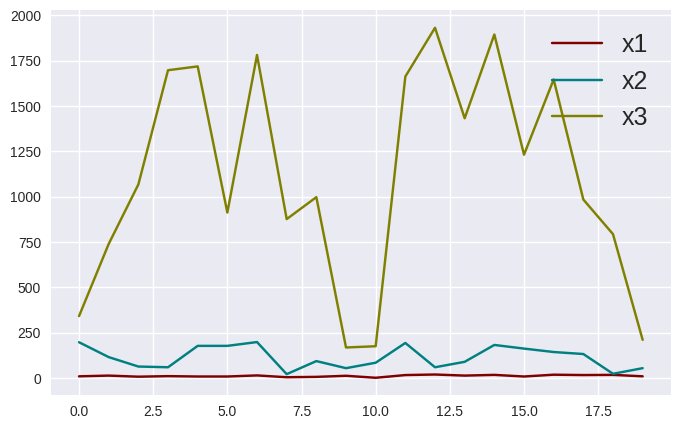

In [4]:
plt.figure(figsize=(8,5))

plt.plot(x1, color='maroon')
plt.plot(x2, color='teal')
plt.plot(x3, color='olive')

plt.legend(['x1','x2','x3'], fontsize=18)
plt.show()

In [5]:
# Mean and SD of different features are quite variable.
print('Mean: ', X.mean(axis=0))
print('STD: ', X.std(axis=0))

Mean:  [  11.25  113.75 1112.7 ]
STD:  [  4.88748402  59.56666434 578.3115164 ]


## 1. Normalization
Normalization is a procedure in which the features' values are scaled such that they range between 0 and 1. This technique is also called Min-Max scaling.

Formula for normalization:

$$X_{new} = \dfrac{X_{old} - X_{min}}{X_{max}-X_{min}}$$

Here, $X_{old}$ is the old value of a data point, which is rescaled to $X_{new}$. Further, $X_{min}$ and $X_{max}$, respectively, are the minimum and the maximum values of the feature $X$.

---
Normalization can be achieved by MinMaxScaler from sklearn library.

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler().fit(X)
X_normalized = mm.transform(X)
X_normalized

array([[0.44444444, 0.99435028, 0.09812819],
       [0.66666667, 0.53107345, 0.32387975],
       [0.33333333, 0.23728814, 0.50992626],
       [0.5       , 0.21468927, 0.8672717 ],
       [0.38888889, 0.88135593, 0.87918321],
       [0.38888889, 0.88135593, 0.42200794],
       [0.72222222, 1.        , 0.91491775],
       [0.16666667, 0.        , 0.4015882 ],
       [0.27777778, 0.40677966, 0.47022121],
       [0.61111111, 0.18644068, 0.        ],
       [0.        , 0.3559322 , 0.0039705 ],
       [0.83333333, 0.97175141, 0.84741917],
       [1.        , 0.21468927, 1.        ],
       [0.66666667, 0.38418079, 0.71695973],
       [0.88888889, 0.90960452, 0.97901305],
       [0.38888889, 0.79661017, 0.60294952],
       [0.94444444, 0.68926554, 0.83834373],
       [0.83333333, 0.62711864, 0.46284742],
       [0.88888889, 0.01129944, 0.35450936],
       [0.44444444, 0.18644068, 0.02382303]])

The means and SDs of different features are now comparable.

In [7]:
print('Mean: ', X_normalized.mean(axis=0))
print('STD: ', X_normalized.std(axis=0))

Mean:  [0.56944444 0.5240113  0.53584799]
STD:  [0.27152689 0.33653483 0.32802695]


## 2. Standardization
Standardization is another feature scaling technique that results into (close to) zero mean and unit standard deviation of a feature's values.

Formula for standardization:

$$X_{new} = \dfrac{X_{old}- \mu}{\sigma}$$

Here, $\mu$ and $\sigma$ respectively are the mean and standard deviation of the feature values.

---
Standardization can be achieved by StandardScaler from sklearn library.


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X)
X_standardized = ss.transform(X)
X_standardized

array([[-0.46035956,  1.39759379, -1.33440192],
       [ 0.35805744,  0.02098489, -0.64619152],
       [-0.86956806, -0.8519866 , -0.07902315],
       [-0.25575531, -0.91913826,  1.01035512],
       [-0.66496381,  1.06183552,  1.04666773],
       [-0.66496381,  1.06183552, -0.34704479],
       [ 0.56266169,  1.4143817 ,  1.15560555],
       [-1.48338081, -1.55707896, -0.40929498],
       [-1.07417231, -0.3483492 , -0.20006518],
       [ 0.15345319, -1.00307782, -1.63354866],
       [-2.09719356, -0.49944042, -1.62144445],
       [ 0.97187019,  1.33044213,  0.9498341 ],
       [ 1.58568294, -0.91913826,  1.41498133],
       [ 0.35805744, -0.41550086,  0.55212457],
       [ 1.17647444,  1.14577509,  1.35100197],
       [-0.66496381,  0.81001682,  0.20456103],
       [ 1.38107869,  0.49104647,  0.92216735],
       [ 0.97187019,  0.30637942, -0.22254442],
       [ 1.17647444, -1.52350314, -0.55281624],
       [-0.46035956, -1.00307782, -1.56092344]])

The means of different features are now comparable and SD is 1.

In [9]:
print('Mean: ', X_standardized.mean(axis=0))
print('STD: ', X_standardized.std(axis=0))

Mean:  [ 3.60822483e-17 -1.11022302e-17 -7.77156117e-17]
STD:  [1. 1. 1.]


# Data Imputation
Missing values can cause problems for machine learning algorithms. Data imputation is a procedure in which we identify the missing values in a dataset and replace them with a numeric value.

These missing values may be replaced by either of the following:

*    Feature's mean value.
*    Feature's median value.
*    Feature's mode value.
*    Some constant value.

---
Sklearn library provides SimpleImputer class that may used for this purpose.

In [10]:
from sklearn.impute import SimpleImputer

**Example 1**

In [11]:
imputer = SimpleImputer(missing_values = -1, strategy = 'mean')

Explanation of the parameters:
*    *missing_values:* Could be `int`, `float`, `str`, `np.nan` or `None`.

    (Default is `np.nan`)
*    *strategy:*  `string`, default is `mean`.

Possible strategies:
*     mean
*     median
*     most_frequent
*     constant (Accompanied by another attribure: `fill_value`)

In [12]:
X1 = np.array([[1, 2, 3], [6, 0, -1], [3, -1, 4]])
print(X1)

[[ 1  2  3]
 [ 6  0 -1]
 [ 3 -1  4]]


In [13]:
imputer = imputer.fit(X1)                 # First `fit` the imputer
X1_imputed = imputer.transform(X1)        # Then `transform` using the imputer
print(X1_imputed)

[[1.  2.  3. ]
 [6.  0.  3.5]
 [3.  1.  4. ]]


**Example 2**

In [14]:
X2 = np.array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, np.nan],
       ['France', 35.0, 58000.0],
       ['Spain', np.nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]])
print(X2)

[['France' '44.0' '72000.0']
 ['Spain' '27.0' '48000.0']
 ['Germany' '30.0' '54000.0']
 ['Spain' '38.0' '61000.0']
 ['Germany' '40.0' 'nan']
 ['France' '35.0' '58000.0']
 ['Spain' 'nan' '52000.0']
 ['France' '48.0' '79000.0']
 ['Germany' '50.0' '83000.0']
 ['France' '37.0' '67000.0']]


In [15]:
imputer2 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer2 = imputer2.fit(X2[:, 1:3])                       # Choosing only numerical columns
X2[:, 1:3] = imputer2.transform(X2[:, 1:3])
print(X2)

[['France' '44.0' '72000.0']
 ['Spain' '27.0' '48000.0']
 ['Germany' '30.0' '54000.0']
 ['Spain' '38.0' '61000.0']
 ['Germany' '40.0' '63777.77777777778']
 ['France' '35.0' '58000.0']
 ['Spain' '38.77777777777778' '52000.0']
 ['France' '48.0' '79000.0']
 ['Germany' '50.0' '83000.0']
 ['France' '37.0' '67000.0']]


**Example 3**

In [16]:
X3 = np.array([[46, 'F', 'US'],
              [65, 'M', 'Canada'],
              [35, 'F','India'],
              [-2, 'M', 'Australia'],
              [49, 'M', 'Netherlands'],
              [-2, 'F', 'South Africa']])
print(X3)

[['46' 'F' 'US']
 ['65' 'M' 'Canada']
 ['35' 'F' 'India']
 ['-2' 'M' 'Australia']
 ['49' 'M' 'Netherlands']
 ['-2' 'F' 'South Africa']]


In [17]:
imputer3 = SimpleImputer(missing_values = -2, strategy = 'mean')
imputer3 = imputer3.fit(X3[:, 0].reshape(-1,1))
X3[:, 0:1] = imputer3.transform(X3[:, 0].reshape(-1,1))
print(X3)

[['46.0' 'F' 'US']
 ['65.0' 'M' 'Canada']
 ['35.0' 'F' 'India']
 ['48.75' 'M' 'Australia']
 ['49.0' 'M' 'Netherlands']
 ['48.75' 'F' 'South Africa']]


# Handling Categorical Features
Categorical features are those that contain categories or groups such as education level, city etc as their data. These are non-numerical features and need to be converted into appropriate form before they may be fed to an ML model.

One intuitive way of handling them could be to assign them a numrical value. As an example, take city as a feature with 'Punjab', 'Rajasthan' and 'Haryana' as the possible values. We might consider assigning numbers to these values as follows:


$$
\begin{array}{c|c}
Old~feature & New~feature \\
\hline
\text{Punjab}&\text{1}\\
\hline
\text{Rajasthan}&\text{2}\\
\hline
\text{Haryana}&\text{3}\\
\end{array}
$$


However, this approach assigns some ordering to the labels, i.e., cities, thus representing that Haryana is thrice Punjab and Rajasthan is twice Punjab. These relationships non-existent in the data, and thus provide wrong information to the ML model.

One of the most-commom approaches to handle this is: *One-hot encoding*.

**One-hot Encoding**

This approach consists of creating an additional feature for each label present in the categorical feature (i.e., the number of different cities here) and putting a 1 or 0 for these new features depending on the categorical feature's value. That is,

$$
\begin{array}{c|c}
Old~feature & New~feature_1 (Punjab) & New~feature_2 (Rajasthan)&New~feature_3 (Haryana)\\
\hline
\text{Punjab}&\text{1}&0&0\\
\hline
\text{Rajasthan}&\text{0}&1&0\\
\hline
\text{Haryana}&\text{0}&0&1\\
\end{array}
$$

---
It may be implemented using OneHotEncoder class from preprocessing library.


In [18]:
from sklearn.preprocessing import OneHotEncoder

**Example 1**

In [19]:
X_cat = np.array([['red'], ['green'], ['blue']])
print(X_cat)

[['red']
 ['green']
 ['blue']]


In [31]:
OHencoder = OneHotEncoder(sparse_output = False)            # When `True`, it returns a sparse matrix in "Compressed Sparse Row" (CSR) format.
encoded_X_cat = OHencoder.fit_transform(X_cat)
print(encoded_X_cat)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


**Example 2**

In [32]:
X_cat2 = np.array([[46, 'F', 'US'],
            [65, 'M', 'Canada'],
            [35, 'F','India'],
            [37, 'M', 'Australia'],
            [49, 'M', 'Netherlands'],
            [73, 'F', 'South Africa']])
print(X_cat2)

[['46' 'F' 'US']
 ['65' 'M' 'Canada']
 ['35' 'F' 'India']
 ['37' 'M' 'Australia']
 ['49' 'M' 'Netherlands']
 ['73' 'F' 'South Africa']]


In [33]:
encoded_country_feature = OHencoder.fit_transform(X_cat2[:, 2:3])
print(encoded_country_feature)

[[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [34]:
encoded_X_cat2 = np.concatenate((X_cat2[:, 0:1], X_cat2[:, 1:2], encoded_country_feature), axis=1)
print(encoded_X_cat2)

[['46' 'F' '0.0' '0.0' '0.0' '0.0' '0.0' '1.0']
 ['65' 'M' '0.0' '1.0' '0.0' '0.0' '0.0' '0.0']
 ['35' 'F' '0.0' '0.0' '1.0' '0.0' '0.0' '0.0']
 ['37' 'M' '1.0' '0.0' '0.0' '0.0' '0.0' '0.0']
 ['49' 'M' '0.0' '0.0' '0.0' '1.0' '0.0' '0.0']
 ['73' 'F' '0.0' '0.0' '0.0' '0.0' '1.0' '0.0']]


# Handling imbalanced data
Imbalanced datasets are those where one class is very less represented than the other class. This kind of data results in less efficient ML algorithms.

There are two main approaches to handle imbalanced data:

*    Undersampling
*    Oversampling

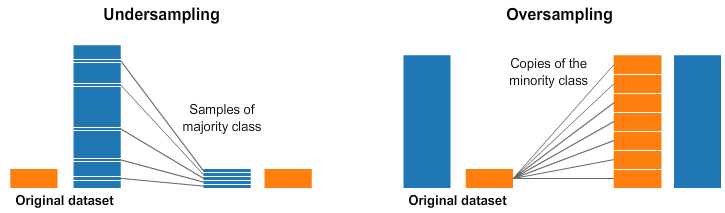

[Source of Image](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets#t1)

## Create imbalanced synthetic dataset

In [59]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 10000,
                           n_features = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           weights = [0.99],
                           flip_y = 0,
                           random_state = 100)

The details of the above parameters are as follows:


*   `n_samples` *(default = 100)* - number of required samples
*   `n_features` *(default = 20)* - number of features in the dataset
*   `n_redundant` *(default = 2)* - number of redundant features, i.e., random linear combinations of the informative features.  
*   `n_clusters_per_class` *(default = 2)* - number of clusters per class
*   `weights` *(default = None)* - array of size `n_classes` or `n_classes-1` storing the proportion of samples assigned to each class. (**NOTE** - `None` means the classes will be balanced). If size of array is `n_classes-1`, then the size of last class is inferred automatically.
*   `flip_y` *(default = 0.01)* - fraction of samples whose class is assigned randomly. More this value, more difficult to get a clean classification.
(**NOTE** - if it is not zero, then the class ratios will not be exact)
*   `random_state` *(default=None)* - random number generation for dataset creation. Pass an int for reproducible output.
*   `n_classes` *(default=2)* - number of classes (or labels) of the classification problem.



In [60]:
from collections import Counter     # It allows you to count the items in an iterable list.
counter = Counter(y)
counter

Counter({0: 9900, 1: 100})

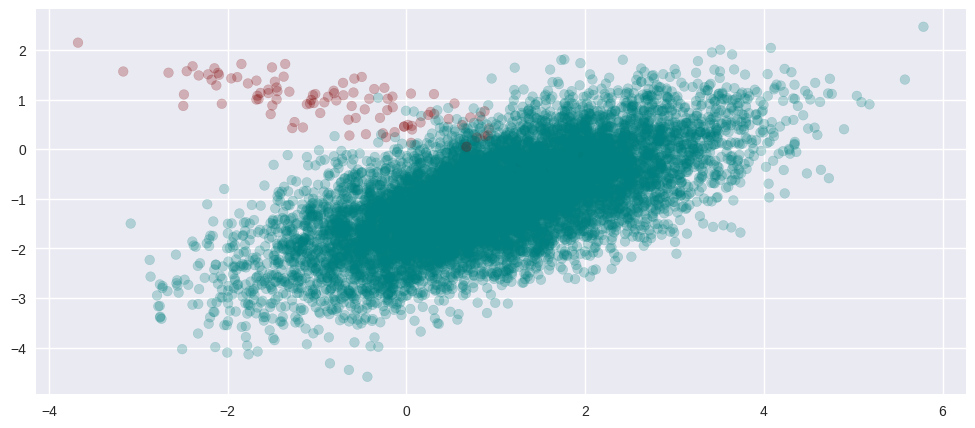

In [61]:
colors = np.where(y == 1, 'maroon', 'teal')

plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], X[:, 1], c = colors, alpha = 0.25)
plt.show()

## Undersampling
Undersampling refers to sampling from the majority class in order to keep only a part of these data points.

It may be carried out using **RandomUnderSampler** class from **imblearn** library.

In [62]:
from imblearn.under_sampling import RandomUnderSampler

In [63]:
undersample = RandomUnderSampler(sampling_strategy = 'majority')
X1, y1 = undersample.fit_resample(X, y)
counter = Counter(y1)
print(counter)

Counter({0: 100, 1: 100})


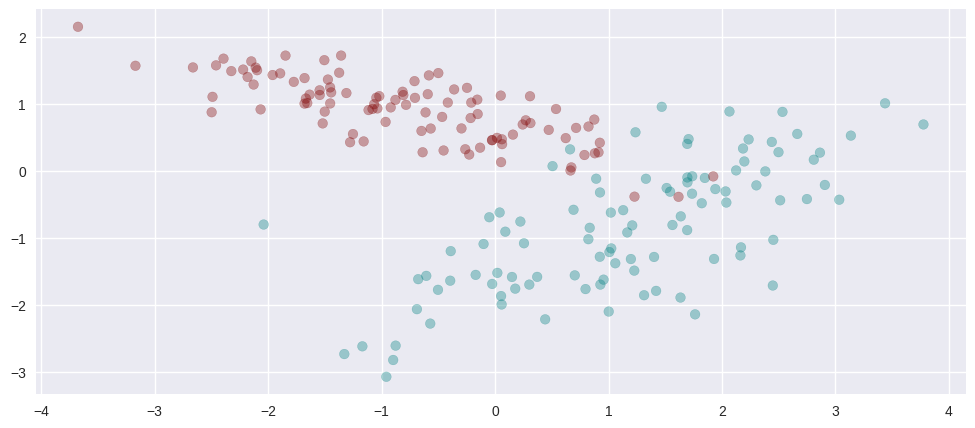

In [64]:
colors = np.where(y1 == 1,'maroon','teal')
plt.figure(figsize=(12, 5))
plt.scatter(X1[:, 0], X1[:, 1], c = colors, alpha = 0.35)
plt.show()

## Oversampling using SMOTE
Oversampling refers to replicating some points from the minority class in order to increase the cardinality of the minority class. This might consist of either replicating or generating synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) is a popular technique for oversampling.

**Types of SMOTE:**
*   Borderline SMOTE
*   Borderline-SMOTE SVM
*   Adaptive Synthetic Sampling (ADASYN)

---
It is available under **imblearn** library.

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X, y)
counter = Counter(y2)
print(counter)

Counter({0: 9900, 1: 9900})


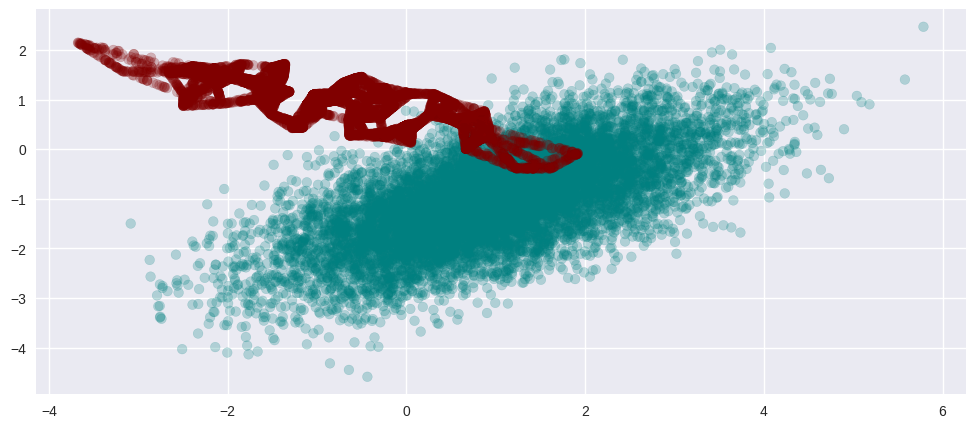

In [68]:
colors = np.where(y2 == 1, 'maroon', 'teal')
plt.figure(figsize=(12, 5))
plt.scatter(X2[:, 0], X2[:, 1], c = colors, alpha = 0.25)
plt.show()